In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import sys
from glob import glob


from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
#import mplfinance as mpf
import seaborn as sns
import yfinance as yf


# Add the src directory to the path
src_dir = os.getenv('SRC_DIR')
if src_dir is None:
	# Fallback: assume notebooks folder is one level below project root
	project_root = os.path.dirname(os.getcwd())
	src_dir = os.path.join(project_root, 'src')
print(f"Adding to path: {src_dir}")
sys.path.append(src_dir)

from utils.logger import get_logger
_logs = get_logger(__name__)

Adding to path: c:\Users\kirti\Documents\Carrer\Uoft_DSI\Project 2\CryptoFinance\src


In [ ]:
# LSTM with Sentiment - 38 features 

In [ ]:
# Load data
# Define ordered column names to enforce consistent schema (overrides original file header)
columns = [
    'Date', 
    'Close',          
    'Open', 
    'High',                
    'Low', 
    'Volume'
]
btc_ocs_columns=["Date","Close","Open","High","Low","Volume","Sentiment"]

btc_file = os.getenv("BTC_DATA")
# Btc data with sentiment to be used for this model
btc_ocs_file= os.getenv("COMBINED_DATA")

# Read the raw CSV:
btc_dt= (pd.read_csv(btc_ocs_file,  usecols= btc_ocs_columns ))



In [3]:
#setting Date as the date time type index
btc_dt["Date"]=pd.to_datetime(btc_dt["Date"])
btc_dt.set_index("Date",drop=True,inplace=True)

In [4]:
from datetime import date
from math import sin, cos, pi
import numpy as np
#Extracting features from date
btc_dt['Year'] = btc_dt.index.year
btc_dt['Month'] = btc_dt.index.month
btc_dt['Day'] = btc_dt.index.day
btc_dt['Dow']=btc_dt.index.dayofweek

#Giving momnth and day cylical attributes
btc_dt['month_sin'] =  np.sin(2 * pi * (btc_dt['Month'] - 1) / 12)
btc_dt['month_cos'] = np.cos(2 * pi * (btc_dt['Month'] - 1) / 12)
btc_dt['dow_sin'] = np.sin(2 * pi * btc_dt['Dow'] / 7)
btc_dt['dow_cos'] = np.cos(2 * pi * btc_dt['Dow'] / 7)

In [5]:
# Signal whether to buy or not 
btc_dt['Open-Close']  = btc_dt['Open'] - btc_dt['Close']
btc_dt['Low-High']  = btc_dt['Low'] - btc_dt['High']

# Create target column with 1% price sensitivity
btc_dt['Target'] = np.where(btc_dt['Close'].shift(-1) > btc_dt['Close'] * 1.01, 1, 0)

In [6]:
btc_dt

,Close,Open,High,Low,Volume,Sentiment,Year,Month,Day,Dow,month_sin,month_cos,dow_sin,dow_cos,Open-Close,Low-High,Target
Date,,,,,,,,,,,,,,,,,
2020-11-05,15608.21,14165.86,15775.00,14115.00,40856321439,1,2020,11,5,3,-0.866025,0.5,0.433884,-0.900969,-1442.35,-1660.00,0
2020-11-06,15599.95,15608.06,15977.67,15190.36,39837841971,1,2020,11,6,4,-0.866025,0.5,-0.433884,-0.900969,8.11,-787.31,0
2020-11-07,14834.09,15599.95,15779.24,14310.00,35024953706,1,2020,11,7,5,-0.866025,0.5,-0.974928,-0.222521,765.86,-1469.24,1
2020-11-08,15482.90,14834.09,15666.00,14721.90,26632075029,1,2020,11,8,6,-0.866025,0.5,-0.781831,0.623490,-648.81,-944.10,0
2020-11-09,15342.25,15482.89,15856.90,14817.14,34149115566,0,2020,11,9,0,-0.866025,0.5,0.000000,1.000000,140.64,-1039.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-01,110052.25,109555.63,110500.00,109342.47,34284209459,1,2025,11,1,5,-0.866025,0.5,-0.974928,-0.222521,-496.62,-1157.53,0
2025-11-02,110536.01,110052.25,111221.99,108800.00,34284209459,1,2025,11,2,6,-0.866025,0.5,-0.781831,0.623490,-483.76,-2421.99,0
2025-11-03,106557.98,110533.83,110749.00,105271.67,74247200768,0,2025,11,3,0,-0.866025,0.5,0.000000,1.000000,3975.85,-5477.33,0


In [7]:
# Technical Analysis Features

# Moving Averages
btc_dt['MA_7'] = btc_dt['Close'].rolling(window=7).mean()
btc_dt['MA_14'] = btc_dt['Close'].rolling(window=14).mean()
btc_dt['MA_21'] = btc_dt['Close'].rolling(window=21).mean()
btc_dt['MA_50'] = btc_dt['Close'].rolling(window=50).mean()
#btc_dt['MA_200'] = btc_dt['Close'].rolling(window=200).mean()

# Exponential Moving Averages
btc_dt['EMA_12'] = btc_dt['Close'].ewm(span=12, adjust=False).mean()
btc_dt['EMA_26'] = btc_dt['Close'].ewm(span=26, adjust=False).mean()

# MACD (Moving Average Convergence Divergence)
btc_dt['MACD'] = btc_dt['EMA_12'] - btc_dt['EMA_26']
btc_dt['MACD_Signal'] = btc_dt['MACD'].ewm(span=9, adjust=False).mean()
btc_dt['MACD_Histogram'] = btc_dt['MACD'] - btc_dt['MACD_Signal']

# Relative Strength Index (RSI)
delta = btc_dt['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
btc_dt['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
btc_dt['BB_Middle'] = btc_dt['Close'].rolling(window=20).mean()
bb_std = btc_dt['Close'].rolling(window=20).std()
btc_dt['BB_Upper'] = btc_dt['BB_Middle'] + (bb_std * 2)
btc_dt['BB_Lower'] = btc_dt['BB_Middle'] - (bb_std * 2)
btc_dt['BB_Width'] = btc_dt['BB_Upper'] - btc_dt['BB_Lower']

# Price Rate of Change (ROC)
btc_dt['ROC'] = ((btc_dt['Close'] - btc_dt['Close'].shift(10)) / btc_dt['Close'].shift(10)) * 100

# Average True Range (ATR) - Volatility Indicator
high_low = btc_dt['High'] - btc_dt['Low']
high_close = np.abs(btc_dt['High'] - btc_dt['Close'].shift())
low_close = np.abs(btc_dt['Low'] - btc_dt['Close'].shift())
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
btc_dt['ATR'] = true_range.rolling(window=14).mean()

# Stochastic Oscillator
low_14 = btc_dt['Low'].rolling(window=14).min()
high_14 = btc_dt['High'].rolling(window=14).max()
btc_dt['Stochastic_%K'] = 100 * ((btc_dt['Close'] - low_14) / (high_14 - low_14))
btc_dt['Stochastic_%D'] = btc_dt['Stochastic_%K'].rolling(window=3).mean()

# On-Balance Volume (OBV)
btc_dt['OBV'] = (np.sign(btc_dt['Close'].diff()) * btc_dt['Volume']).fillna(0).cumsum()

# Volume Rate of Change
btc_dt['Volume_ROC'] = ((btc_dt['Volume'] - btc_dt['Volume'].shift(5)) / btc_dt['Volume'].shift(5)) * 100

# Price momentum
btc_dt['Momentum'] = btc_dt['Close'] - btc_dt['Close'].shift(4)

# Percentage change features
btc_dt['Daily_Return'] = btc_dt['Close'].pct_change() * 100
btc_dt['Volatility_10'] = btc_dt['Daily_Return'].rolling(window=10).std()
btc_dt['Volatility_30'] = btc_dt['Daily_Return'].rolling(window=30).std()

In [ ]:
# Shift Target one data row
btc_dt["Target"]=btc_dt["Target"].shift(-1)

In [9]:
btc_dt

,Close,Open,High,Low,Volume,Sentiment,Year,Month,Day,Dow,...,ROC,ATR,Stochastic_%K,Stochastic_%D,OBV,Volume_ROC,Momentum,Daily_Return,Volatility_10,Volatility_30
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-05,15608.21,14165.86,15775.00,14115.00,40856321439,1,2020,11,5,3,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
2020-11-06,15599.95,15608.06,15977.67,15190.36,39837841971,1,2020,11,6,4,...,NaN,NaN,NaN,NaN,-3.983784e+10,NaN,NaN,-0.052921,NaN,NaN
2020-11-07,14834.09,15599.95,15779.24,14310.00,35024953706,1,2020,11,7,5,...,NaN,NaN,NaN,NaN,-7.486280e+10,NaN,NaN,-4.909375,NaN,NaN
2020-11-08,15482.90,14834.09,15666.00,14721.90,26632075029,1,2020,11,8,6,...,NaN,NaN,NaN,NaN,-4.823072e+10,NaN,NaN,4.373777,NaN,NaN
2020-11-09,15342.25,15482.89,15856.90,14817.14,34149115566,0,2020,11,9,0,...,NaN,NaN,NaN,NaN,-8.237984e+10,NaN,-265.96,-0.908422,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-01,110052.25,109555.63,110500.00,109342.47,34284209459,1,2025,11,1,5,...,2.292371,3514.302143,38.386209,36.372769,2.668850e+11,-46.869306,-2854.50,0.453634,1.644630,2.147360
2025-11-02,110536.01,110052.25,111221.99,108800.00,34284209459,1,2025,11,2,6,...,0.381398,3443.890714,42.017505,37.991224,3.011692e+11,-46.869306,503.88,0.439573,1.474029,2.128293
2025-11-03,106557.98,110533.83,110749.00,105271.67,74247200768,0,2025,11,3,0,...,-4.038242,3528.079286,11.548437,30.650717,2.269220e+11,6.563766,-1750.20,-3.598854,1.833426,2.208918


In [ ]:
# Find Data Rrows with null values and filter the rows
columns_with_null=btc_dt.isnull().sum()
btc_dt_trim_1=btc_dt[50:len(btc_dt)-1]
btc_dt_trim_1


,Close,Open,High,Low,Volume,Sentiment,Year,Month,Day,Dow,...,ROC,ATR,Stochastic_%K,Stochastic_%D,OBV,Volume_ROC,Momentum,Daily_Return,Volatility_10,Volatility_30
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-25,24704.71,23718.61,24770.95,23416.00,42068395846,1,2020,12,25,4,...,27.051778,1319.742857,99.018286,91.469934,3.488746e+11,11.161986,1975.31,4.160349,4.173396,3.935619
2020-12-26,26475.35,24704.71,26822.00,24490.01,48332647295,1,2020,12,26,5,...,23.950299,1419.758571,95.716139,95.357705,3.972072e+11,5.408477,2652.08,7.167216,3.709015,3.680671
2020-12-27,26258.65,26482.64,28387.00,25772.55,66479895605,1,2020,12,27,6,...,15.035914,1557.145714,77.404420,90.712948,3.307273e+11,50.503596,3030.30,-0.818497,3.427190,3.693974
2020-12-28,27040.36,26255.16,27477.00,26086.19,49056742893,0,2020,12,28,0,...,16.866801,1629.182143,85.575418,86.231993,3.797841e+11,-4.085192,3322.40,2.976962,3.459832,3.686968
2020-12-29,27366.35,27039.39,27396.77,25833.73,45265946774,0,2020,12,29,1,...,14.743654,1704.132857,88.768020,83.915953,4.250500e+11,10.187706,2661.64,1.205568,3.422853,3.681079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-31,109555.27,108308.02,111066.10,108266.11,60090359560,1,2025,10,31,4,...,1.100937,3515.763571,33.569956,40.421708,2.326008e+11,44.072131,-4531.79,1.151427,1.669106,2.172553
2025-11-01,110052.25,109555.63,110500.00,109342.47,34284209459,1,2025,11,1,5,...,2.292371,3514.302143,38.386209,36.372769,2.668850e+11,-46.869306,-2854.50,0.453634,1.644630,2.147360
2025-11-02,110536.01,110052.25,111221.99,108800.00,34284209459,1,2025,11,2,6,...,0.381398,3443.890714,42.017505,37.991224,3.011692e+11,-46.869306,503.88,0.439573,1.474029,2.128293


In [11]:
#Pick features for first run , Only picking  features with out null values
all_columns=btc_dt_trim_1.columns
features_1=all_columns[btc_dt_trim_1.isnull().sum()==0]
lstm1_df=btc_dt_trim_1[features_1]
print(features_1,len(features_1))

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Sentiment', 'Year', 'Month',
       'Day', 'Dow', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos',
       'Open-Close', 'Low-High', 'Target', 'MA_7', 'MA_14', 'MA_21', 'MA_50',
       'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Histogram', 'RSI',
       'BB_Middle', 'BB_Upper', 'BB_Lower', 'BB_Width', 'ROC', 'ATR',
       'Stochastic_%K', 'Stochastic_%D', 'OBV', 'Volume_ROC', 'Momentum',
       'Daily_Return', 'Volatility_10', 'Volatility_30'],
      dtype='object') 41


In [12]:
#We have a data set lstm1_df. Apply Min max scaler on all columns except sin and cos month and day of week.
from sklearn.preprocessing import StandardScaler
lstm1_features= [col for col in lstm1_df.columns if col not in ["Month","Dow"] ]
lstm1_df=lstm1_df[lstm1_features]

#
lstm1_X=lstm1_df[lstm1_df.columns[lstm1_df.columns!="Target"]]
lstm1_y=lstm1_df["Target"]

#Apply the sclaers
stan_scaler=StandardScaler()
lstm1_X_features_to_scaler=[col for col in lstm1_X.columns if col not in ["month_sin","month_cos","dow_sin","dow_cos"]]
lstm1_X_scaled=lstm1_X
lstm1_X_scaled[lstm1_X_features_to_scaler]=stan_scaler.fit_transform(lstm1_X_scaled[lstm1_X_features_to_scaler])

C:\Users\kirti\AppData\Local\Temp\ipykernel_23804\2985941197.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm1_X_scaled[lstm1_X_features_to_scaler]=stan_scaler.fit_transform(lstm1_X_scaled[lstm1_X_features_to_scaler])


In [13]:
print(lstm1_features,len(lstm1_features))

['Close', 'Open', 'High', 'Low', 'Volume', 'Sentiment', 'Year', 'Day', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos', 'Open-Close', 'Low-High', 'Target', 'MA_7', 'MA_14', 'MA_21', 'MA_50', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Histogram', 'RSI', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'BB_Width', 'ROC', 'ATR', 'Stochastic_%K', 'Stochastic_%D', 'OBV', 'Volume_ROC', 'Momentum', 'Daily_Return', 'Volatility_10', 'Volatility_30'] 39


In [ ]:

len(lstm1_X_scaled.columns)


38

In [15]:
#splitting the data in batcsize for 
batch_size=10
X=[]
y=[]

for i in range(batch_size,len(lstm1_X_scaled)):
    X.append(lstm1_X_scaled[i-batch_size:i])
    y.append(lstm1_y.values[i])

In [16]:
#Splitting the data into test and train
data_split=len(X)-100
X_train=np.array(X[:data_split])
X_test=np.array(X[data_split:])
y_train=np.array(y[:data_split])
y_test=np.array(y[data_split:])




In [17]:
#initialize the LSTM model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(units=128,return_sequences=True,input_shape=(10,38)))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=64))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.summary()



c:\Users\kirti\.conda\envs\dsi_participant\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        85,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,601 (600.00 KB)

 Trainable params: 153,601 (600.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# #compile and train my model
model.compile(optimizer="adam",loss="binary_crossentropy", metrics =  ["accuracy"])
history=model.fit(X_train,y_train,validation_split= 0.2 ,batch_size=8,epochs=10)

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6667 - loss: 0.6454 - val_accuracy: 0.7006 - val_loss: 0.6337
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6742 - loss: 0.6379 - val_accuracy: 0.7006 - val_loss: 0.6229
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6742 - loss: 0.6325 - val_accuracy: 0.7006 - val_loss: 0.6144
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6742 - loss: 0.6299 - val_accuracy: 0.7006 - val_loss: 0.6117
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6742 - loss: 0.6336 - val_accuracy: 0.7006 - val_loss: 0.6039
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6742 - loss: 0.6305 - val_accuracy: 0.7006 - val_loss: 0.6027
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6742 - loss: 0.6232 - val_accuracy: 0.7006 - val_loss: 0.6199
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6742 - loss: 0.6214 - val_accura

In [ ]:
# Make predictions
predict=model.predict(X_test)
predict

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


array([[0.11960189],
       [0.11702175],
       [0.11060053],
       [0.10951045],
       [0.11878299],
       [0.12724984],
       [0.12412381],
       [0.11476602],
       [0.10844591],
       [0.10747907],
       [0.1031246 ],
       [0.09892873],
       [0.10134099],
       [0.09756447],
       [0.09178101],
       [0.09448895],
       [0.09165826],
       [0.09044565],
       [0.1066561 ],
       [0.10466003],
       [0.10152981],
       [0.09846128],
       [0.10009155],
       [0.10970845],
       [0.10465173],
       [0.11659569],
       [0.11106981],
       [0.11675484],
       [0.12104307],
       [0.12797888],
       [0.1227487 ],
       [0.13129993],
       [0.13248962],
       [0.15551554],
       [0.14491212],
       [0.14338493],
       [0.13972381],
       [0.13292922],
       [0.13594896],
       [0.14518227],
       [0.14840525],
       [0.14594944],
       [0.13120854],
       [0.11725071],
       [0.10920507],
       [0.09513821],
       [0.09472683],
       [0.096

In [ ]:
#Calculating accuracy and confuison matrix values
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy=[]
confusion_matrix_list=[]
proba_threshold=np.arange(0.05,0.8,0.05)
for proba in proba_threshold:
    predict_threshold_proba = [1 if i[0] > proba else 0 for i in predict]
    confusion_matrix_list.append(confusion_matrix(y_test,predict_threshold_proba))
    accuracy.append(accuracy_score(y_test,predict_threshold_proba)) 



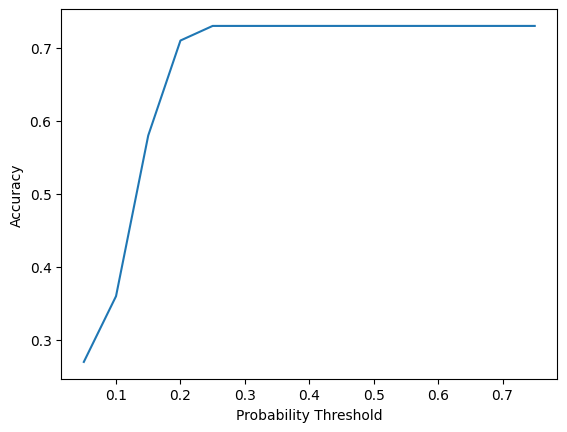

In [ ]:
# Plotting accuracy vs Proba Threshold
import  matplotlib.pyplot as plt
plt.plot(proba_threshold,accuracy)
plt.xlabel("Probability Threshold")
plt.ylabel("Accuracy")
plt.show()

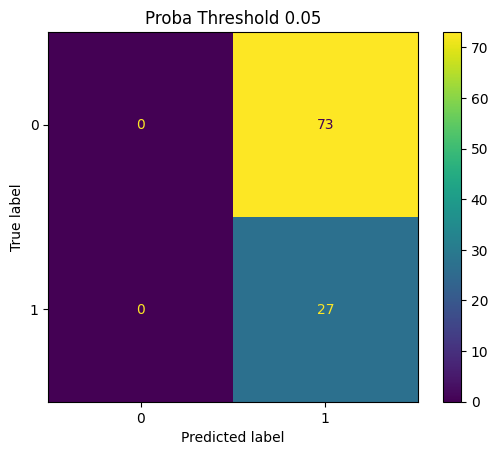

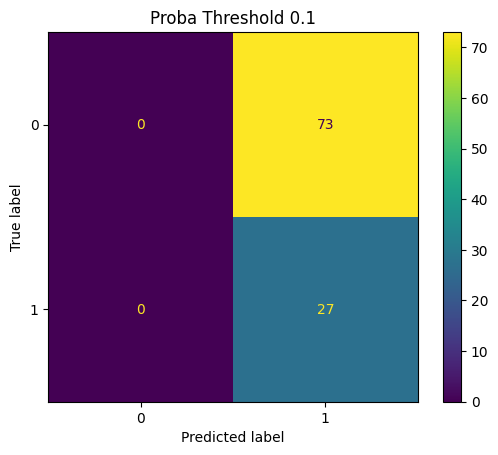

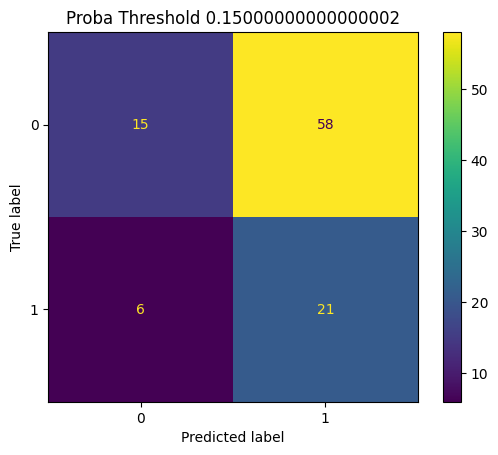

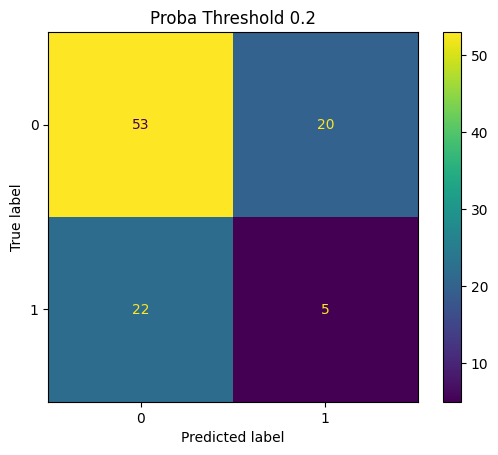

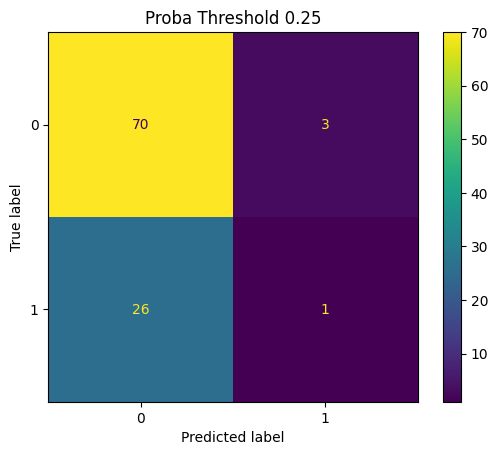

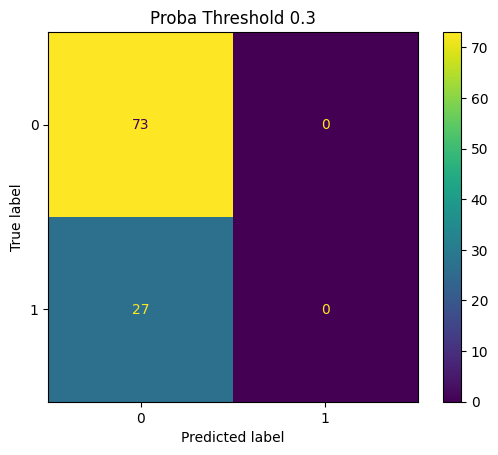

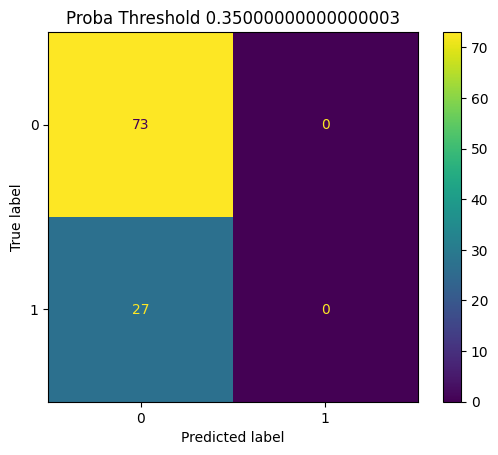

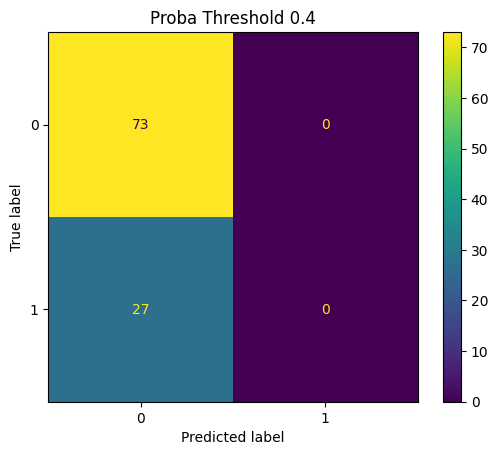

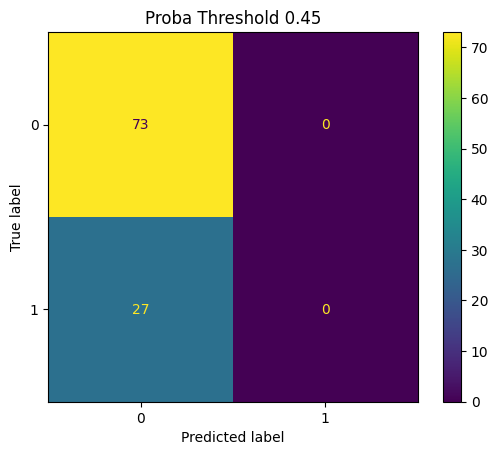

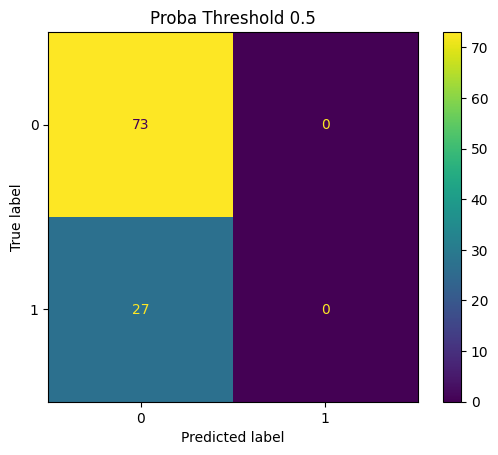

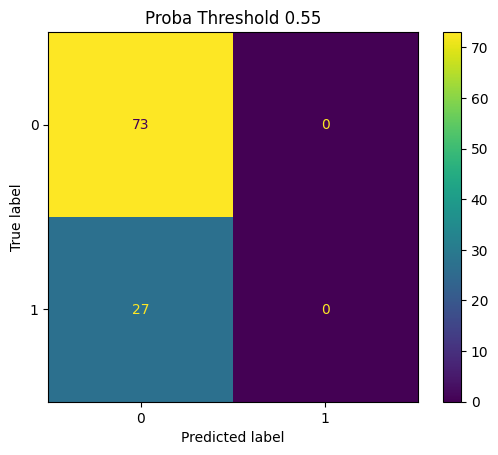

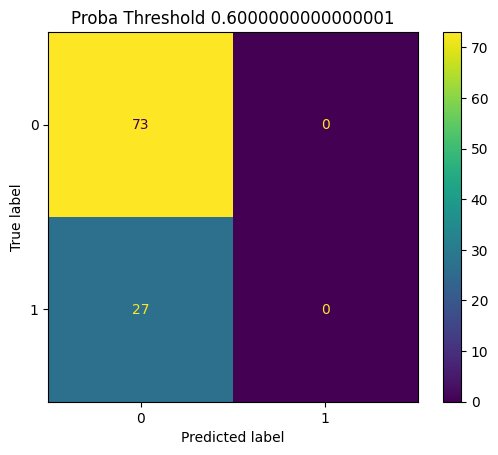

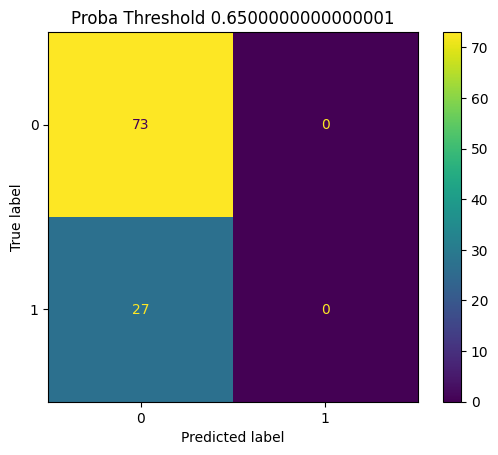

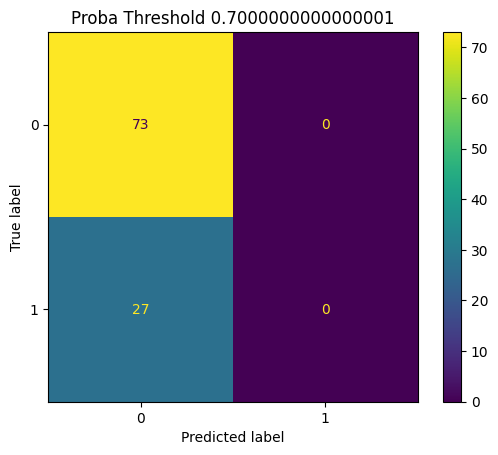

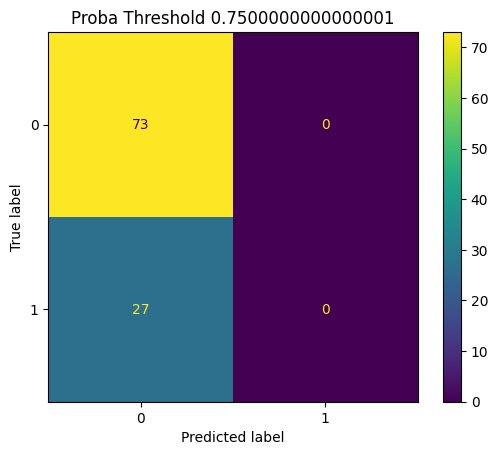

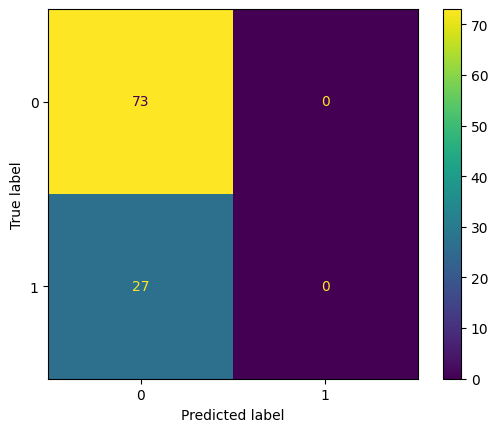

In [ ]:
#Plotting Confusion Matrix with different Proba Threshold
from sklearn.metrics import ConfusionMatrixDisplay 
disp=ConfusionMatrixDisplay(confusion_matrix_list[0])
disp.plot()
for i in range(0,len(confusion_matrix_list)):
    disp=ConfusionMatrixDisplay(confusion_matrix_list[i])
    plt.title(f"Proba Threshold {proba_threshold[i]}")
    disp.plot()
